# Filmes e Séries: Netflix

## Parte 1: Coleta e Análise Primária dos Dados

In [118]:
# Importando as bibliotecas que serão utilizadas para a realização dos trabalhos:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Definindo algumas configurações iniciais em relação a estilização e dimensões de gráficos 
# para plotagem posterior:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style='darkgrid')

In [119]:
# Criando o DataFrame:
df_movies = pd.read_csv('data/netflix_movies.csv')

In [120]:
# Visualizando os primeiros 5 registros do DataFrame
df_movies.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [121]:
# Visualizando um sample aleatório do DataFrame:
df_movies.sample(5)

,title,year,certificate,duration,genre,rating,description,stars,votes
2756,Cyber Hell: Exposing an Internet Horror,(2022),TV-MA,105 min,"Documentary, Crime",6.5,"Anonymous and exploitative, a network of onlin...","['Jin-sung Choi', '| ', ' Stars:', 'Chang E...","1,628"
4131,Team Zenko Go,(2022– ),TV-Y,24 min,"Animation, Family",7.4,No good deed is too small for this kind kid sq...,"['Tabitha St. Germain, ', 'Dominic Mariche, ',...",47
9005,Midnight Mass,(2021),TV-MA,59 min,"Drama, Fantasy, Horror",7.3,Riley Flynn returns home to family dysfunction...,"['Mike Flanagan', '| ', ' Stars:', 'Kate Si...","3,841"
4345,Seven in Heaven,(2018),PG-13,94 min,"Drama, Horror, Mystery",5.3,Teenagers Jude and June spend seven minutes in...,"['Chris Eigeman', '| ', ' Stars:', 'Travis ...","2,748"
6416,One More Time,(VI),NaN,NaN,Comedy,NaN,40-year-old Amelia who is hit by a bus on her ...,"['Jonatan Etzler', '| ', ' Star:', 'Hedda S...",NaN


In [122]:
# Determinando as dimensões do DataFrame:
df_movies.shape

(9957, 9)

Com essa informação, sabemos que nosso DataFrame é composto por **9957 linhas** e **9 colunas**.

In [123]:
# Coletando mais informações acerca do DataFrame utilizando o comando .info():
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


Utilizando o comando .info(), podemos estrair algumas informações iniciais importantes sobre os dados:

- Apenas as colunas **`title`**, **`description`** e **`stars`** possuem registros completos sem valores nulos;

- Das 9 colunas, 8 estão no formato *object* (string), sendo que algumas delas como as colunas `year` e `votes` por exemplo poderiam e deveriam estar em valores numéricos.

A seguir, iremos realizar uma checagem mais focada nos dados faltantes do DataFrame:

In [124]:
# Checando porcentagem de dados faltantes no DataFrame:
(((df_movies.isnull().sum() / df_movies.shape[0]) * 100).sort_values(ascending=False)).round(4)

certificate    34.6791
duration       20.4479
rating         11.7807
votes          11.7807
year            5.2928
genre           0.7332
title           0.0000
description     0.0000
stars           0.0000
dtype: float64

Dos registros presentes nas 9 colunas do DataFrame, as colunas:

- **`certificate`** possui 34.68% de valores nulos;

- **`duration`** possui 20.45% de valores nulos;

- **`rating`** e **`votes`** possuem 11.78% de valores nulos;

- **`year`** possui 5.29% de valores nulos;

- **`genre`** possui 0.73% de valores nulos.

### Dicionário de Variáveis

Para termos uma compreensão ainda maior acerca dos nossos dados, realizaremos uma descrição de cada uma das colunas presentes no DataFrame, entrando em detalhes onde for necessário:

- **`title`** - Título da obra (séries, filmes, etc);

- **`year`** - Tupla que contém duas datas: (ano_de_lançamento - ano de encerramento), tendo uma diferença entre obras "únicas" como filmes e obras "contínuas" como Séries:
    
    - *Séries*: (ano_estreia_primeiro_ep - ano_estreia_útlimo_ep) ou apenas (ano_estreia_primeiro_ep - );
    
    - *Filmes*: (ano_lançamento)

- **`certificate`** - Certificado de classificação, em formatos distintos para cada tipo de mídia e baseados em diferentes métricas de avaliação de conteúdo (essa é a coluna mais complexa do DataFrame, onde as definições a seguir foram baseadas em pesquisas realizadas acerca de cada tipo de certificado):

    - *Programas Televisivos: TV Parental Guidelines*

        - **TV-14**: Não recomendado para menores de 14 anos;
        
        - **TV-MA**: Audiência madura - Não recomendado para menores de 17 anos;
        
        - **TV-PG**: Conteúdos recomendados para serem consumidos com orientação parental;

        - **TV-Y7-FV**: Não recomendado para menores de 7 anos, contém violência fantasiosa;

        - **TV-G**: Recomendado para todos os públicos;

        - **TV-Y7**: Não recomendado para menores de 7 anos;

        - **TV-Y**: Conteúdo infantil.

    - *Filmes: Motion Picture Association film rating system*

        - **NC-17**: Ninguém com 17 anos ou menos admitido;

        - **R**: Menores de 17 anos requerem acompanhamento dos pais ou responsáveis adultos;

        - **PG-13**: Alguns materiais podem ser impróprios para crianças menores de 13 anos;

        - **PG**: Parte do material pode não ser adequado para crianças;

        - **G**: Todas as idades admitidas.

    - *Entertainment Software Rating Board*

        - **M (Mature)**: Não recomendado para menores de 17 anos;

        - **E10+**: Recomendado para públicos a partir de 10 anos.

    - *Outros formatos de avaliação presentes*

        - **Not Rated/Unrated**: Sem classificação. Significa que a mídia específica não foi classificada por meio de um processo de classificação. Isso geralmente implica que um trabalho nunca foi autoclassificado ou submetido a um órgão de classificação por diversos motivos como, por exemplo, devido a natureza do trabalho (como um evento esportivo) ou por motivos orçamentários;

        - **Approved/Passed**: Sob o [Código Hays](https://www.megacurioso.com.br/artes-cultura/123329-codigo-hays-as-regras-que-censuravam-filmes-na-era-de-ouro-de-hollywood.htm), os filmes eram simplesmente aprovados ou reprovados com base no fato de serem considerados "morais" ou "imorais". Esse tipo de avaliação é específico para o recorte histórico durante a década de 1930.

        - **12**: Não recomendado para menores de 12 anos;

        - **MA-17**: Não recomendado para menores de 17 anos.

- **`duration`** - Duração do filme ou duração dos episódios de Séries (em minutos);

- **`genre`** - Gênero(s) da obra;

- **`rating`** - Nota de avaliação [IMDb](https://www.imdb.com/);

- **`description`** - Sinópse da obra;

- **`stars`** - Atores de destaque;

- **`votes`** - Quantidade de votos no IMDb.



## Parte 2: Tratamento dos Dados

Para que se possa ter resultados precisos na análise, é necessário a limpeza e tratamento de dados no DataFrame. Para iniciarmos esse processo, vamos checar novamente os data types das colunas:

In [125]:
# Checando os data types:
df_movies.dtypes

title           object
year            object
certificate     object
duration        object
genre           object
rating         float64
description     object
stars           object
votes           object
dtype: object

In [126]:
# Puxando apenas uma linha do DataFrame para visualizarmos melhor os dados:
df_movies.head(1)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"


Algumas conclusões preliminares podem ser feitas sobre certas colunas:

- **`year`**: O formato dessa coluna é menos que ideal para as análises, sendo assim, algumas mudanças serão realizadas nela. Primeiramente dividi-la em duas colunas diferentes, cada uma contendo o ano de lançamento e o ano de encerramento respectivamente. Já que filmes somente possuem o primeiro valor (lançamento), iremos utilizar 0 como placeholder na segunda coluna (ano de encerramento);

- **`duration`**: Para facilitar as análises, será adaptada para em seu título informar a métrica de tempo usada (minutos) e apenas numeração nos dados em si;

- **`votes`**: Trasformar o data type para tipo float.

In [127]:
# Criação de uma cópia do DataFrame onde será realizada a limpeza e tratativa dos dados:
df_movies_clean = df_movies.copy()

### Tratamento: Coluna year

Para podermos criar duas colunas a partir da coluna year, onde cada uma irá conter o ano de lançamento e ano de encerramento respectivamente, iremos utilizar o método regex para auxiliar nessa operação, onde necessitamos apenas dos valores numéricos que representam os anos:

In [128]:
# Criando uma variável que contém dado Regex para remoção (Remover tudo que não seja número da string):
remove = r'[^0-9]+'

In [129]:
# Utilizando método apply para limpar caracteres indesejáveis da coluna year aplicando a variável regex:
df_movies_clean['year'] = df_movies['year'].apply(
    lambda x: re.sub(remove, '', str(x))
)

# Checando novos dados da coluna year:
df_movies_clean['year'].sample(5)

3974    20012002
1368        2018
2305    20182019
7109            
3367        2018
Name: year, dtype: object

Com apenas valores numéricos presentes na tabela year, podemos criar as duas novas colunas constando os anos de lançamento e encerramento:

In [130]:
# Criando nova coluna que consta o primeiro ano da tabela year (ano de lançamento):
df_movies_clean['release_year'] = df_movies_clean['year'].apply(
    lambda x: str(x)[:4] if len(str(x)) == 8 else x
)

# Checando novos dados:
df_movies_clean['release_year'].sample(5)

3177    2019
1972    2015
7756    2017
3859    2015
7380    2014
Name: release_year, dtype: object

In [131]:
# Criando nova coluna que consta o últímo ano da tabela year (ano de encerramento).
# Caso não exista (como no caso de filmes), colocar 0:
df_movies_clean['ending_year'] = df_movies_clean['year'].apply(
    lambda x: str(x)[-4:] if len(str(x)) == 8 else 0
)

# Checando resultados:
df_movies_clean['ending_year'].sample(5)

2508       0
9379    2022
357     2021
1994       0
8418       0
Name: ending_year, dtype: object

É necessário agora conferir a integridade dos dados de ambas as novas colunas, checando por valores vazios:

In [132]:
# Checando dados vazios da coluna release_year:
df_movies_clean.loc[
    (df_movies_clean['release_year'] == ""), 
    'release_year'
    ].count()

631

In [133]:
# Checando dados vazios da coluna ending_year:
df_movies_clean.loc[
    (df_movies_clean['ending_year'] == ""),
    'ending_year'
    ].count()

0

A coluna `release_year` possui 631 registros faltantes, já a coluna `ending_year` não possui nenhum.

In [134]:
# Tratando dados faltantes da coluna release_year:
df_movies_clean['release_year'] = df_movies_clean['release_year'].apply(
    lambda x: 0 if str(x).isalnum() == False else x
)

Com nossas duas novas colunas de anos, basta transforma-las para o tipo numérico de dados:

In [135]:
# Transformando dados nas colunas de release_year e ending_year para int:
df_movies_clean['release_year'] = df_movies_clean['release_year'].astype(int)
df_movies_clean['ending_year'] = df_movies_clean['ending_year'].astype(int)

### Tratamento: Coluna duration

Como analisado previamente, a coluna `duration` pode ter sua métrica de tempo (minutos) destacada no header e os dados apenas em valores numéricos. Sendo assim, primeiramente se faz necessário remover as letras "min" da coluna:

In [136]:
# Limpando a coluna duration para retirada de letras:
df_movies_clean['duration'] = df_movies_clean['duration'].apply(
    lambda x: 0 if str(x) == 'nan' else str(x)[:-4]
)

# Checando um sample dos resultados:
df_movies_clean['duration'].sample(5)

699     112
26       22
2043    138
5773     87
8431      0
Name: duration, dtype: object

In [137]:
# Transformando a coluna duration para int
df_movies_clean['duration'] = df_movies_clean['duration'].astype(int)

In [138]:
# Renomeando coluna duration para informar que a mesma está em minutos:
df_movies_clean.columns = df_movies_clean.columns.str.replace('duration', 'duration_min')

### Tratamento: Coluna votes

A coluna `votes` será tratada da seguinte maneira: Substituindo valores nulos por 0, retirando vírgulas dos dados e os transformando em números inteiros.

In [139]:
# Substituíndo valores nulos para 0:
df_movies_clean['votes'] = df_movies_clean['votes'].apply(
    lambda x: 0 if str(x) == 'nan' else x
)

In [140]:
# Retirando vírgulas:
df_movies_clean['votes'] = df_movies_clean['votes'].apply(
    lambda x: str(x).replace(',','')
)

In [141]:
# Passando valores para int:
df_movies_clean['votes'] = df_movies_clean['votes'].astype(int)

In [142]:
# Visualizando resultados:
df_movies_clean['votes'].sample(5)

6844     194
5093     474
4029    2061
6103      30
8474    5981
Name: votes, dtype: int32

### Tratamento: Colunas Stars, Certificate, Rating e Genre

Como essas colunas necessitam apenas de correções básicas, elas estão agrupadas num único capítulo.

- Coluna Stars:

In [143]:
# Substituíndo valores nulos por [not informed]:
df_movies_clean['stars'] = df_movies_clean['stars'].apply(
    lambda x: '[Not Informed]' if str(x) == '[]' else x
)

- Coluna Certificate:

In [144]:
# Substituíndo valores nulos por [not informed]:
df_movies_clean['certificate'] = df_movies_clean['certificate'].apply(
    lambda x: '[Not Informed]' if str(x) == 'nan' else x
)

- Coluna Rating

In [145]:
# Substituindo valores nulos por 0
df_movies_clean['rating'] = df_movies_clean['rating'].apply(
    lambda x: 0 if str(x) == 'nan' else x
)

- Coluna genre

In [146]:
# Substituindo valores nulos por [not informed]
df_movies_clean['genre'] = df_movies_clean['genre'].apply(
    lambda x: '[Not informed]' if str(x) == 'nan' else x
)

Com essas alterações feitas, o DataFrame se encontra em condições apropriadas para análises e retirada de insights. Como última alteração, a sequência das colunas será alterada para melhor visualização:

In [147]:
# Reorganizando o dataframe para uma visualização melhor
df_movies_clean = df_movies_clean.loc[:, 
                            ['title', 'release_year', 'ending_year', 'certificate', 'duration_min', 
                            'genre', 'rating', 'description', 'stars', 'votes']]

# Checando nova visualização                     
df_movies_clean.sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
8733,The Queen and the Conqueror,2020,0,[Not Informed],0,"Drama, History",0.0,When their search for Sol takes them into the ...,"['Emmanuel Esparza, ', 'Essined Aponte, ', 'Ma...",0
1049,Live by Night,2016,0,R,129,"Action, Thriller",6.4,A group of Boston-bred gangsters set up shop i...,"['Ben Affleck', '| ', ' Stars:', 'Ben Affle...",57377
1292,Ma Rainey's Black Bottom,2020,0,R,94,"Drama, Music",6.9,Tensions rise when trailblazing blues singer M...,"['George C. Wolfe', '| ', ' Stars:', 'Viola...",52538
6802,Todo Dia a Mesma Noite,0,0,[Not Informed],0,"Biography, Drama, Mystery",0.0,"A fire at Nightclub Kiss, which killed 242 peo...","['André De Mello, ', 'Raquel Karro, ', 'Leonar...",0
2129,Night in Paradise,2020,0,TV-MA,131,"Action, Crime, Drama",6.7,Hiding out in Jeju Island following a brutal t...,"['Park Hoon-jung', '| ', ' Stars:', 'Tae-go...",6998


Como checagem extra, vamos conferir se o DataFrame possui registros duplicados:

In [148]:
# Checando se o data frame contém linhas repetidas
df_movies_clean.loc[
    (df_movies_clean.duplicated() == True),
    :
    ]

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes


## Parte 3: Histogramas, Outliers e Análises Iniciais

Com os dados limpos e organizados, podemos partir para a próxima etapa da análise, que consiste em checar por outliers e compreender melhor a distribuição dos dados ao longo do DataFrame utilizando Histogramas.

Como um primeiro passo, vamos utilizar o comando .describe() nas colunas numéricas para realizar a checagem por outliers e dados relevantes:

In [149]:
# Utilizando describe() para checar os dados:
df_movies_clean[
    ['release_year', 'ending_year', 'duration_min', 'rating', 'votes']
    ].describe()

,release_year,ending_year,duration_min,rating,votes
count,9957.000000,9957.000000,9957.000000,9957.000000,9.957000e+03
mean,1888.050316,314.059657,58.686853,5.967611,1.722323e+04
std,491.205456,731.459807,53.820112,2.461310,8.249809e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2014.000000,0.000000,22.000000,5.500000,1.300000e+02
50%,2018.000000,0.000000,52.000000,6.700000,8.420000e+02
75%,2020.000000,0.000000,93.000000,7.500000,4.260000e+03
max,2025.000000,2023.000000,990.000000,9.900000,1.844075e+06


Com essa tabela, temos algumas informações importantes:

- Coluna **`release_year`**:

    - O ano máximo presente nos dados é 2025, sendo que estamos em 2022 no tempo de confecção deste trabalho, logo, isso indica que possivelmente algumas das datas de lançamento são previsões de obras ainda não lançadas, porém que já constam no catálogo da Netflix como projetos com datas previstas de estreia. Esse fato será levado em conta nas análises posteriores.

- Coluna **`ending_year`**:

    - Similarmente a coluna release_year, o ano máximo de encerramento de uma obra é maior do que o ano de confecção do projeto, sendo 2023 essa data máxima. Isso provavelmente signifca que temos obras como Séries que ou já possuem data limite de exibição ou estão se aproximando do seu final, onde já possuem data de encerramento.

- Coluna **`duration`**:

    - 75% dos dados constam duração máxima de 93 minutos, porém o valor máximo presente é de 990. Isso indica claramente um outlier. Uma possibilidade de explicação, é a de que algumas séries podem ter sido lançadas no banco de dados em um único registro, onde a minutagem total representa a soma de todos os seus episódios, onde outras séries foram inseridas episódio por episódio no banco de dados.

- Coluna **`votes`**:

    - Como a quantidade de votos é muito grande, as análises por meios de gráficos provavelmente terão que ser realizadas utilizando escala logarítimica para melhor visualização.

Para podermos explorar melhor essas características dos dados, vamos plotar histogramas e boxplots para cada coluna numérica:

### Coluna release_year

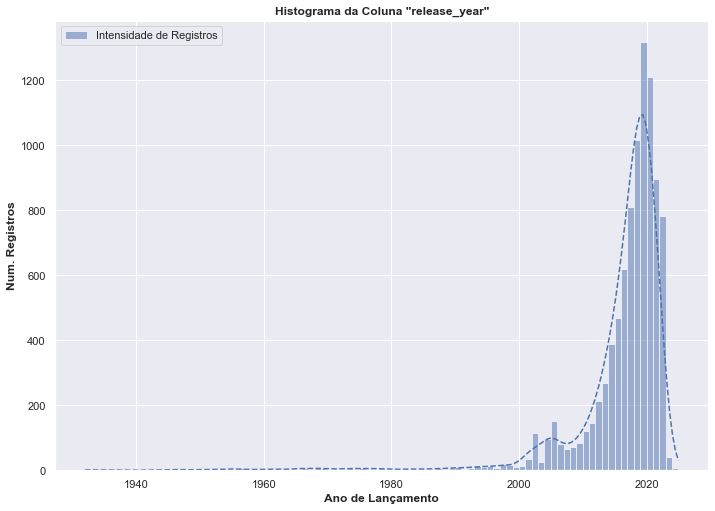

In [150]:
# Histograma

# Selecionando dados existentes, ou seja, aqueles diferentes de 0 para compor a análise:
release_year = df_movies_clean.loc[
    (df_movies_clean['release_year'] != 0), 
    ['release_year']
    ]

# Plotando:
sns.histplot(
    data=release_year, 
    x='release_year', 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=1, 
    line_kws={'linestyle':'dashed'}
    )

plt.title('Histograma da Coluna "release_year"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Ano de Lançamento', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

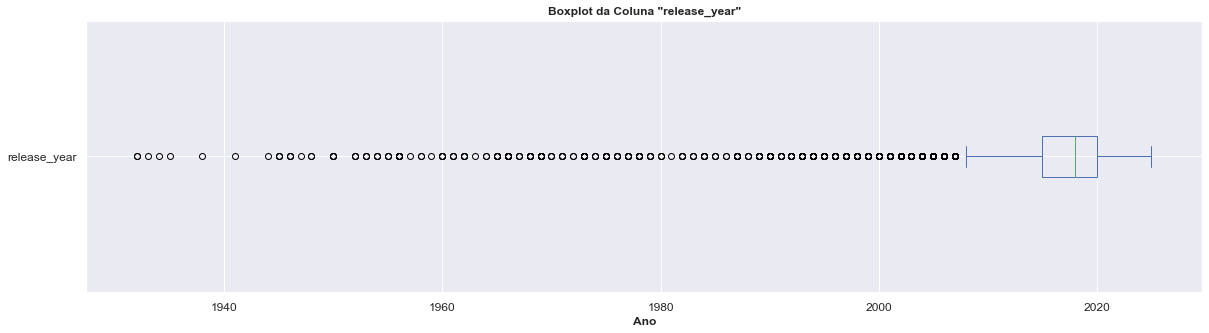

Anos acima de 2022:
47 entradas
0.5040%


In [151]:
# Boxplot

# Selecionando dados diferentes de 0 para checagem distributiva dos dados:
release_year = df_movies_clean.loc[
    (df_movies_clean['release_year'] != 0), 
    ['release_year']
    ]

# Plotando:
release_year.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12
    )

plt.title('Boxplot da Coluna "release_year"', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')

plt.show()

# Printando a quantidade anos que estão acima de 2022 (ano da confecção desse projeto):
print("Anos acima de 2022:")
print("{} entradas".format(len(release_year[release_year['release_year'] > 2022])))
print("{:.4f}%".format((len(release_year[release_year['release_year'] > 2022]) / release_year.shape[0]) * 100))

Alguns insights podem ser adiquiridos a partir dessas análises:

- Como apontam tanto o Histograma quanto o Boxplot, a maioria dos projetos possuem ano de lançamento por volta de 2020;

- De acordo com o Boxplot, 47 registros possuem anos de lançamento agendados para anos acima de 2022;

- Por mais que os quartis estejam agrupados por volta de 2020, ainda temos registros de filmes bem mais antigos do que isso, como alguns que constam como lançamento datas anteriores a 1940.

Como forma de visualização, vamos checar alguns desses registros que possuem data de lançamento maiores de 2022:

In [152]:
# checando entradas acima de 2022:
df_movies_clean.query('release_year > 2022').sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
2965,The Archies,2023,0,[Not Informed],0,"Comedy, Drama, Musical",0.0,"The Archies, film is an Indian adaptation of t...","['Zoya Akhtar', '| ', ' Stars:', 'Khushi Ka...",0
7928,Eurovision Song Contest Ukraine 2023,2023,0,[Not Informed],0,Music,0.0,Ukraine has won the 66th ESC 2022 in Turin. On...,[Not Informed],0
1121,You People,2023,0,[Not Informed],0,"Comedy, Romance",0.0,"Follows a new couple and their families, who f...","['Kenya Barris', '| ', ' Stars:', 'Julia Lo...",0
2523,The Brothers Sun,2023,0,[Not Informed],0,"Action, Comedy, Drama",0.0,"Follows Charles Sun, a Taipei gangster who's s...","['Michelle Yeoh, ', 'Highdee Kuan, ', 'Sam Son...",0
288,Untitled Super Mario Project,2023,0,[Not Informed],0,"Animation, Adventure, Comedy",0.0,A plumber named Mario travels through an under...,"['Aaron Horvath, ', 'Michael Jelenic', '| ', '...",0


- Como são projetos que estão agendados para estrear, eles não possuem nenhum tipo de avaliação, duração nem votos, para essa análise eles serão retirados, pois o objetivo é analisar os programas já lançados e seus respectivos dados.

In [153]:
# Retirar programas sem dados que estão agendados para estreia no futuro
df_movies_clean = df_movies_clean.drop(
    df_movies_clean[df_movies_clean['release_year'] > 2022].index
    )

### Coluna ending_year

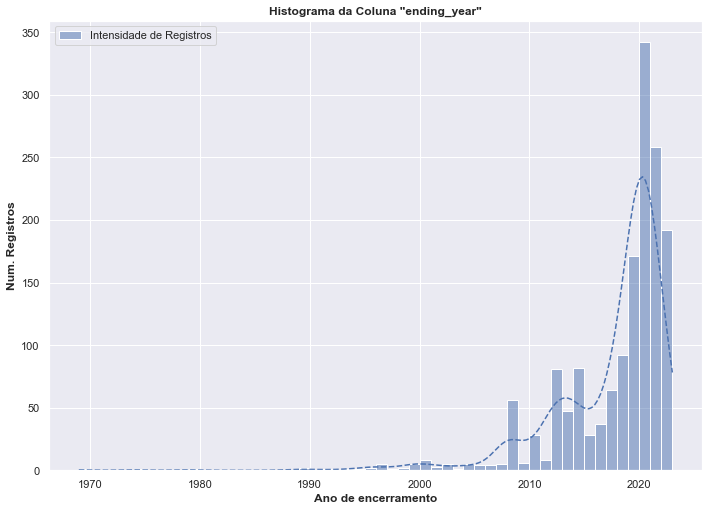

In [154]:
# Histograma

# Selecionando dados diferentes de 0:
ending_year = df_movies_clean.loc[
    (df_movies_clean['ending_year'] != 0), 
    ['ending_year']
    ]

# Plotando
sns.histplot(
    data=ending_year, 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=1, 
    line_kws={'linestyle': 'dashed'}
    )

plt.title('Histograma da Coluna "ending_year"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Ano de encerramento', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

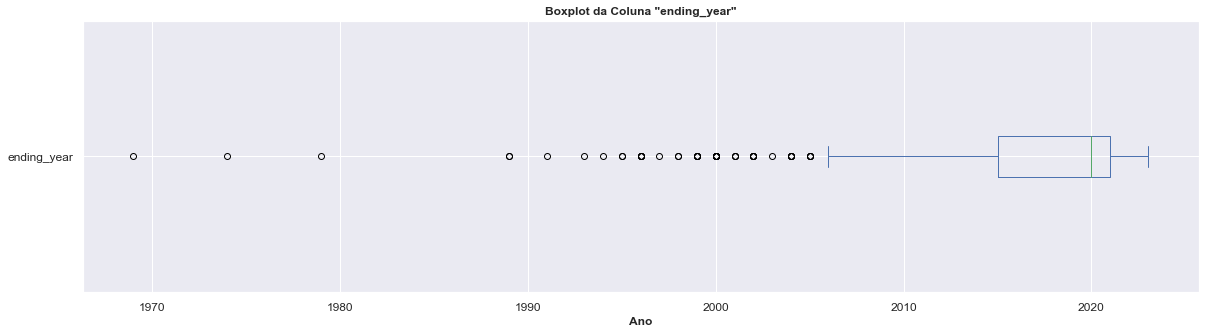

Anos acima de 2022:
53 entradas
3.4194%


In [155]:
# Boxplot

# Selecionando dados diferente de 0:
ending_year = df_movies_clean.loc[
    (df_movies_clean['ending_year'] != 0), 
    ['ending_year']
    ]

# Plotando
ending_year.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12
    )

plt.title('Boxplot da Coluna "ending_year"', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')

plt.show()

# Printando a quantidade de registros acima de 2022:
print("Anos acima de 2022:")
print("{} entradas".format(len(ending_year[ending_year['ending_year'] > 2022])))
print("{:.4f}%".format((len(ending_year[ending_year['ending_year'] > 2022]) / ending_year.shape[0]) * 100))

Como apontam o Histograam e o Boxplot, curiosamente o ano de encerramento mais comum é o mesmo ano de lançamento mais comum, 2020. Isso pode indicar algumas coisas:

- Lançamentos de mini-séries que se iniciam e terminam no mesmo ano;

- É válido considerar a [pandemia de Covid-19 e seus impactos na indústria do cinema](https://www.vet.k-state.edu/about/news-events-publications/OneHealth/Vol14-Iss1/film-industry.html#:~:text=As%20a%20result%20of%20the,produced%20in%202021%20or%202022.), onde muitas produções de filmes e séries foram canceladas, encerradas abruptamente ou postergadas para anos seguintes durante 2020, o que pode compor uma explicação para tantos encerramentos em 2020. 

Vamos checar alguns desses registros que constam data de encerramento maiores que 2022:

In [156]:
# checando  entradas acima de 2022:
df_movies_clean.query('ending_year > 2022').sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
8386,The Flash,2014,2023,TV-PG,42,"Action, Adventure, Drama",8.4,As Barry stands on the threshold of his impend...,"['Chad Lowe', '| ', ' Stars:', 'Grant Gusti...",2296
8385,The Flash,2014,2023,TV-PG,42,"Action, Adventure, Drama",7.3,Barry turns his attention to prepping Elongate...,"['Danielle Panabaker', '| ', ' Stars:', 'Gr...",1894
8922,The Flash,2014,2023,TV-PG,42,"Action, Adventure, Drama",4.9,Barry and Iris plan a romantic dinner for Vale...,"['Sudz Sutherland', '| ', ' Stars:', 'Grant...",2124
9563,Snowpiercer,2020,2023,TV-MA,47,"Action, Drama, Sci-Fi",7.1,As the Big Alice crew are granted shore leave ...,"['David Frazee', '| ', ' Stars:', 'Daveed D...",1096
9548,Snowpiercer,2020,2023,TV-MA,47,"Action, Drama, Sci-Fi",7.7,Mr. Wilford has arrived. And as this new threa...,"['Christoph Schrewe', '| ', ' Stars:', 'Jen...",1444


- São programas já estabelecidos que possuem um ano previsto para finalização (a série The Umbrella Academy como exemplificado acima com 3 episódios aparecendo na sample), nesse caso iremos deixá-los na análise justamente por possuirem dados relevantes (minutagem, rating e votos).

### Coluna duration_min

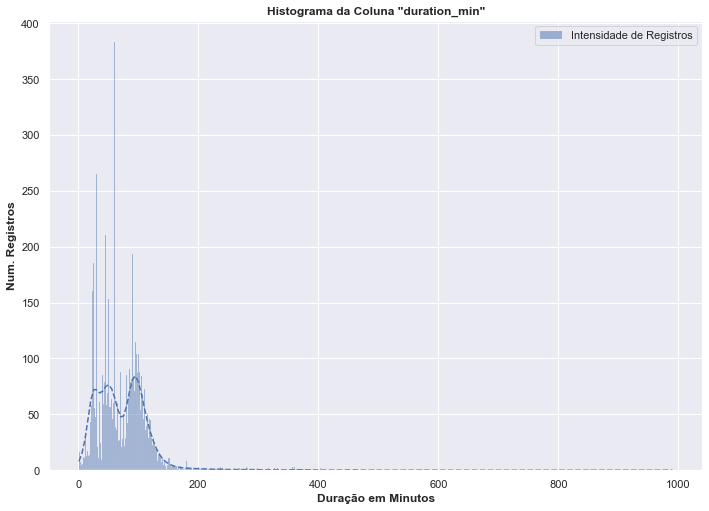

In [157]:
# Histograma

# Selecionando dados diferentes de 0:
duration_min = df_movies_clean.loc[
(df_movies_clean['duration_min'] != 0), 
['duration_min']
]

# Plotando:
sns.histplot(
    data=duration_min, 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=1, 
    line_kws={'linestyle': 'dashed'}
    )

plt.title('Histograma da Coluna "duration_min"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Duração em Minutos', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

Somente com o histograma é aparente a distribuição não adequada da coluna de minutagem, onde a grande maioria dos dados estão abaixo de por volta 150 a 200 minutos porém o eixo X vai até 1000.

Com o boxplot, iremos visualizar quantos desses registros estão acima de 175 minutos, com um bom middle-point entre 150 e 200 para termos uma dimensão melhor dos outliers.

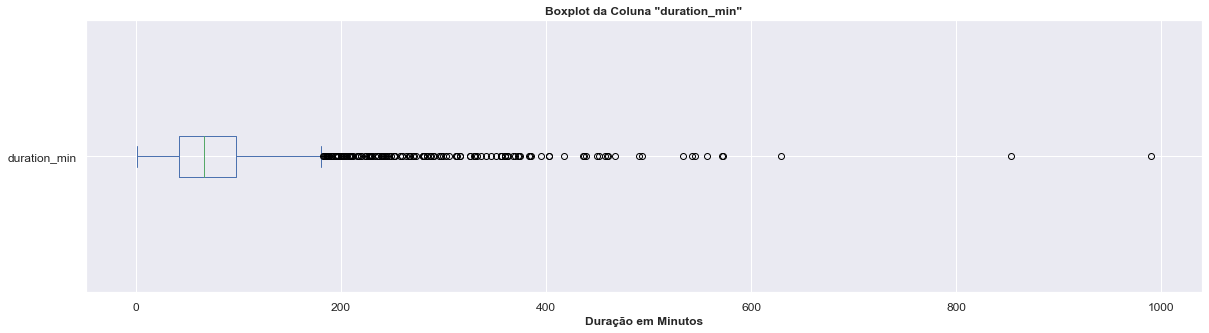

Minutagens acima de 175:
172 entradas
2.1731%


In [158]:
# Boxplot

# Selecionando dados diferentes de 0:
duration_min = df_movies_clean.loc[
    (df_movies_clean['duration_min'] != 0), 
    ['duration_min']
    ]


# Plotando:
duration_min.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12
    )

plt.title('Boxplot da Coluna "duration_min"', fontsize=12, fontweight='bold')
plt.xlabel('Duração em Minutos', fontsize=12, fontweight='bold')

plt.show()

# Mostrando registros acima de 175 minutos:
print("Minutagens acima de 175:")
print("{} entradas".format(len(duration_min[duration_min['duration_min'] > 175])))
print("{:.4f}%".format((len(duration_min[duration_min['duration_min'] > 175]) / duration_min.shape[0]) * 100))

É aparente que temos outliers nessa coluna, porém, para termos uma compreensão melhor do que são esses registros com minutagens tão extensas, vamos puxar um sample do DataFrame para visualização:

In [159]:
# Checando entradas acima de 175 minutos:
df_movies_clean.query('duration_min > 175').sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
262,The Haunting of Bly Manor,2020,0,TV-MA,494,"Drama, Horror, Mystery",7.3,"After an au pair’s tragic death, Henry hires a...","['Victoria Pedretti, ', 'Oliver Jackson-Cohen,...",101853
1492,Wild Wild Country,2018,0,TV-MA,403,"Documentary, Crime",8.1,"When Osho, the world's most controversial guru...","['Ma Anand Sheela, ', 'Philip Toelkes, ', 'Jan...",31079
1805,The Billion Dollar Code,2021,0,TV-MA,267,"Biography, Crime, Drama",8.0,"In 1990s Berlin, an artist and a hacker invent...","['Leonard Scheicher, ', 'Marius Ahrendt, ', 'M...",8579
464,The Serpent,2021,0,TV-MA,458,"Crime, Drama, Thriller",7.6,"The twisting, real-life story of Charles Sobhr...","['Tahar Rahim, ', 'Billy Howle, ', 'Jenna Cole...",43200
4434,The Driver,2014,0,[Not Informed],180,"Crime, Drama",6.9,Taxi driver Vince McKee finds his life taking ...,"['David Morrissey, ', 'Claudie Blakley, ', 'Ia...",1911


- Os registros são séries cujas inserções no banco de dados aparentemente se deu de uma vez só em um único registro, causando com que a minutagem fosse o acumulado de todas as minutagens dos episódios das séries;

- Além de séries temos também documentários presentes como The Family e provavelmente alguns longas metragem como Lord Of The Ring também devem estar presentes nos registros.

In [160]:
# Checando para ver um longa como Lord Of The Rings compõe parte desses dados com minutagem
# acima de 175 minutos:
df_movies_clean.loc[
    df_movies_clean['title'].str.contains("Rings")
    ]

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
20,The Lord of the Rings: The Fellowship of the Ring,2001,0,PG-13,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844055
57,The Lord of the Rings: The Return of the King,2003,0,PG-13,201,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157
78,The Lord of the Rings: The Two Towers,2002,0,PG-13,179,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708
9921,The Lord of the Rings: The Fellowship of the Ring,2001,0,PG-13,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075


Com a informação de que esses outliers de minutagem também são dados válidos para a análise porém são longos demais que iriam distorcer as análises, como solução iremos dividir o DataFrame em dois, onde teremos:

- DataFrame contendo dados de obras com minutagem menor do que 175 minutos;

- DataFrame contendo dados de obras com minutagem maior do que 175 minutos (longas, séries, documentários).

Dessa forma, se é capaz de ter análises pertinentes a respeito desses registros de minutagens longas e também dos de minutagem mais curta.

### Coluna rating

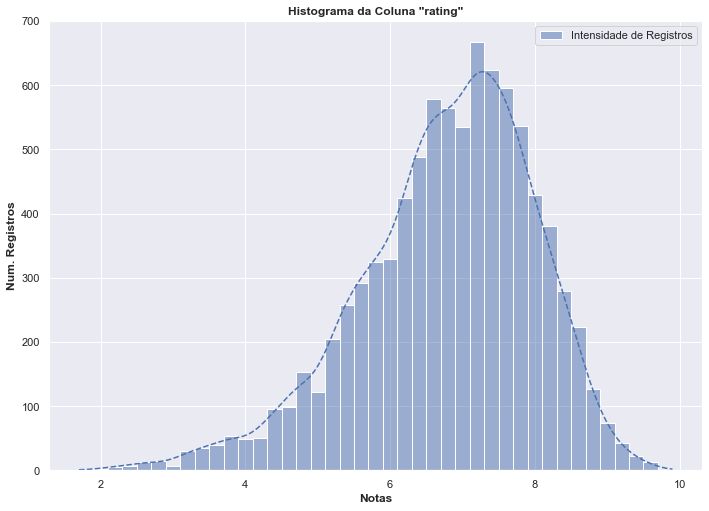

In [161]:
# Histograma

# Selecionando dados diferentes de 0:
rating = df_movies_clean.loc[
    (df_movies_clean['rating'] != 0), 
    ['rating']
    ]

# Plotando:
sns.histplot(
    data=rating, 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=0.2, 
    line_kws={'linestyle': 'dashed'}
    )

plt.title('Histograma da Coluna "rating"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Notas', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

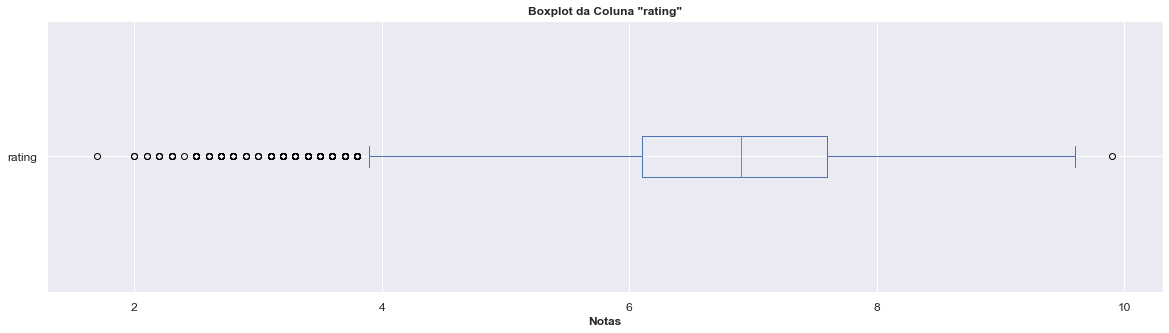

In [162]:
# Boxplot

# Selecionando dados diferentes de 0:
ratings = df_movies_clean.loc[
    (df_movies_clean['rating'] != 0), 
    ['rating']
    ]

# Plotando:
ratings.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12
    )

plt.title('Boxplot da Coluna "rating"', fontsize=12, fontweight='bold')
plt.xlabel('Notas', fontsize=12, fontweight='bold')

plt.show()

Aqui podemos ter uma visualização melhor dos dados da coluna rating, onde a maioria das obras receberam uma avaliação de por volta 7, tendo alguns registos abaixo de 4 e um abaixo de 2.

Com o Histograma, podemos ver que os dados estão distribuidos de forma homogênia com uma tendência a direita.

### Coluna votes

Como dito nas primeiras checagens da coluna votes, pela quantidade massiva de votos dados para cada projeto, a visualização do Histograma dessa coluna será feita em escala logarítimica para melhor visualização.

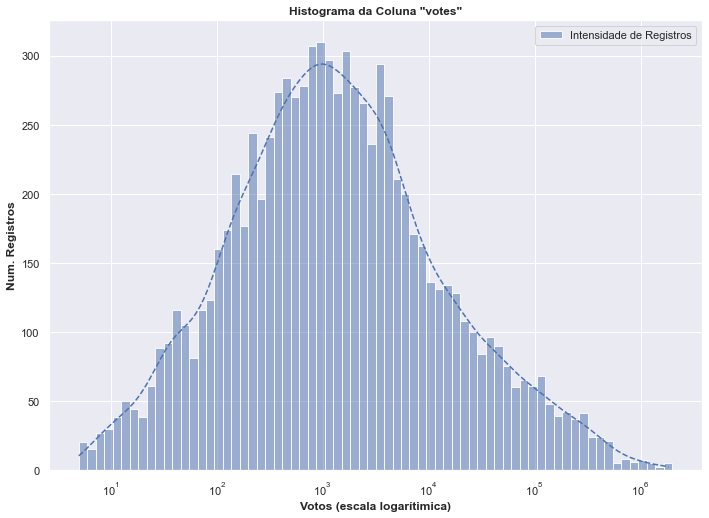

In [163]:
# Histograma

# Selecionando dados diferentes de 0:
votes = df_movies_clean.loc[
    (df_movies_clean['votes'] != 0), 
    ['votes']
    ]

# Plotando:
sns.histplot(
    data=votes, 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=0.08, 
    line_kws={'linestyle': 'dashed'}, 
    log_scale=True
    )

plt.title('Histograma da Coluna "votes"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Votos (escala logarítimica)', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

Aqui temos o inverso do visualizado no histograma da coluna rating, uma distribuição homogênia dos dados que tende a esquerda.

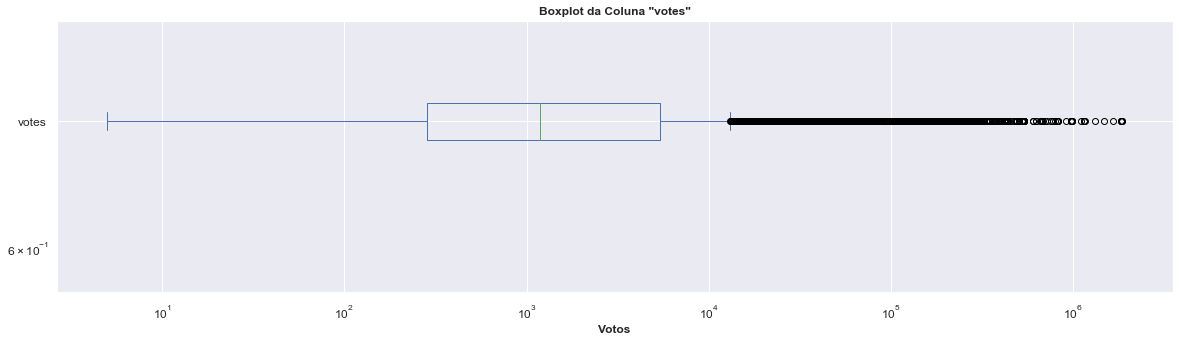

In [164]:
# Boxplot

# Selecionando dados diferentes de 0:
votes = df_movies_clean.loc[
    (df_movies_clean['votes'] != 0), 
    ['votes']
    ]

# Plotando:
votes.plot(
    kind='box', 
    vert=False, 
    figsize=(20,5), 
    fontsize=12,
    loglog=True
    )

plt.title('Boxplot da Coluna "votes"', fontsize=12, fontweight='bold')
plt.xlabel('Votos', fontsize=12, fontweight='bold')

plt.show()

A tendência a esquerda dos dados pode ser bem visualizada com o boxplot, onde alguns outliers estão mais a direita.

Como um último ajuste aos dados por agora, iremos remover todos os registros que não costam nenhum dado numérico, ou seja, que não serão relevantes para a análise.

A exemplo de visualização, vamos puxar alguns desses dados do Dataset:

In [165]:
# Pesquisando os dados vazios no DataFrame e retirando-os:
df_movies_clean = df_movies_clean.drop(df_movies_clean.loc[
    (df_movies_clean['release_year'] == 0) & 
    (df_movies_clean['ending_year'] == 0) & 
    (df_movies_clean['duration_min'] == 0) & 
    (df_movies_clean['rating'] == 0) & 
    (df_movies_clean['votes'] == 0), :].index)

Com o conhecimento dos outliers e características dos dados como um todo, a próxima etapa consistirá em dividir o DataFrame em dois (de minutagem curta e longa), assim poderemos realizar as análises para gerar insights mais aprofundados.

## Parte 4: Limpando Outliers Necessários e Reagrupando DataFrame

Com o DataFrame analisado, constatou-se a massiva diferença na minutagem de projetos acima de 175 minutos, onde eles mesmo sendo muito díspares do restante dos dados, ainda possuem dados relevantes para análise. Com a divisão em dois do DataFrame, poderemos realizar análises próprias desses outliers que não passam de longas, documentários ou séries com apenas um registro somatório de seus episódios, não parecendo certo apenas descartá-los do Dataset como um todo.

In [166]:
# Criando um dataframe separado para os programas de longa-metragem (acima de 175 min):
df_long_duration = df_movies_clean.loc[
    (df_movies_clean['duration_min'] > 175), 
    :
    ].copy()

# Resetando o index desse novo DataFrame:
df_long_duration = df_long_duration.reset_index(0, drop=True)

# Visualizando um sample desses dados:
df_long_duration.sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
156,Bobby Kennedy for President,2018,0,TV-MA,245,"Documentary, Biography, Drama",8.1,This four-part documentary series weaves toget...,"['Paul Schrade, ', 'Peter Edelman, ', 'Harry B...",1842
56,Don't F**k with Cats: Hunting an Internet Killer,2019,0,TV-MA,187,"Documentary, Crime",8.0,A group of online justice seekers track down a...,"['Deanna Thompson, ', 'John Green, ', 'Claudet...",53411
96,Pretend It's a City,2021,0,TV-14,203,"Documentary, Biography, Comedy",8.1,Wander the New York City streets and fascinati...,"['Fran Lebowitz, ', 'Martin Scorsese, ', 'Mich...",7460
158,Stories of a Generation - with Pope Francis,2021,0,TV-14,184,Documentary,7.5,Pope Francis and other men and women all over ...,"['Pope Francis, ', 'Martin Scorsese, ', 'Elias...",228
52,Collateral,2018,0,TV-MA,230,"Crime, Drama, Mystery",6.7,Investigating the murder of a pizza delivery m...,"['Carey Mulligan, ', 'Nathaniel Martello-White...",18307


Com esses registros acima de 175 minutos em um DataFrame próprio, basta removê-los do Dataset limpo original para que restem apenas os registros abaixo dessa minutagem:

In [167]:
# Removendo esse longas do dataframe original:
df_movies_clean = df_movies_clean.drop(
    df_movies_clean[df_movies_clean['duration_min'] > 175].index
    )

# Visualizando um sample do Dataset:
df_movies_clean.sample(5)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
7188,Rodney Carrington: Here Comes the Truth,2017,0,[Not Informed],66,"Documentary, Comedy",4.5,Raunchy country comic and musician Rodney Carr...,['Rodney Carrington'],169
8386,The Flash,2014,2023,TV-PG,42,"Action, Adventure, Drama",8.4,As Barry stands on the threshold of his impend...,"['Chad Lowe', '| ', ' Stars:', 'Grant Gusti...",2296
5368,Jonas Brothers Family Roast,2021,0,TV-MA,68,"Comedy, Musical",5.2,It's the Jonas Brothers like you've never seen...,"['Alex Van Wagner, ', 'Maureen Bharoocha', '| ...",1679
5968,Prague,2013,0,Not Rated,109,"Horror, Mystery, Romance",5.5,The chaotic ramblings of a young architect's m...,"['Ashish R. Shukla', '| ', ' Stars:', 'Chan...",373
6409,Spirit Riding Free: Pony Tales,2017,0,TV-Y7,0,"Animation, Short, Adventure",6.8,The fun continues for Lucky and her friends wi...,"['Amber Frank, ', 'Bailey Gambertoglio, ', 'Sy...",95


Com os dados separados por minutagem, vamos refazer o Histograma da coluna duration_min de ambos os DataFrames:

### Histograma: df_movies_clean

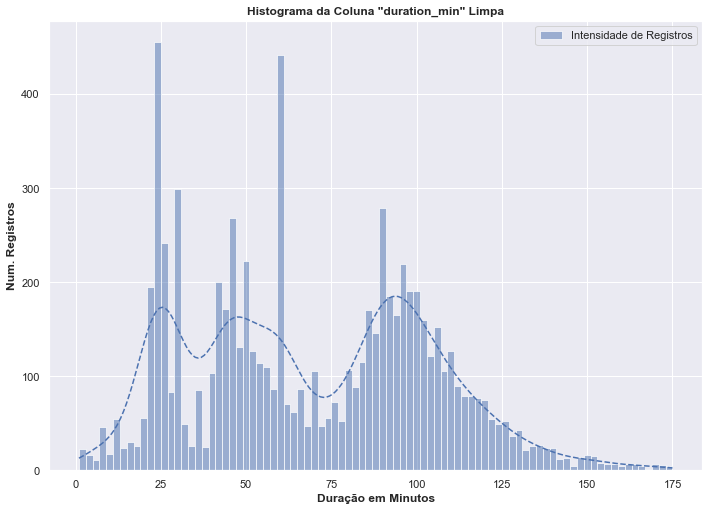

In [168]:
# Histograma

# Selecionando dados diferentes de 0:
duration_min = df_movies_clean.loc[
    (df_movies_clean['duration_min'] != 0), 
    ['duration_min']
    ]

# Plotando
sns.histplot(
    data=duration_min, 
    kde=True, 
    label='Intensidade de Registros', 
    binwidth=2, 
    line_kws={'linestyle': 'dashed'}
    )

plt.title('Histograma da Coluna "duration_min" Limpa', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Duração em Minutos', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

Com a minutagem apenas abaixo de 175 minutos presente, a distribuição dos dados no df_movies_clean ficou mais aparente. Agora realizaremos o mesmo processo para visualizar a minutagem do df_long_duration:

### Histograma: df_long_duration

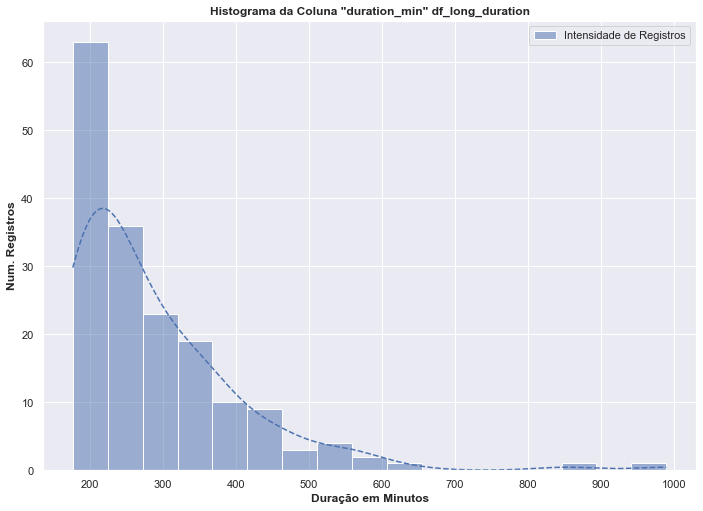

In [169]:
# Histograma

# Selecionando dados diferentes de 0:
duration_min_long = df_long_duration.loc[
    (df_long_duration['duration_min'] != 0), 
    ['duration_min']
    ]

# Plotando
sns.histplot(
    data=duration_min_long, 
    kde=True, 
    label='Intensidade de Registros', 
    line_kws={'linestyle': 'dashed'}
    )

plt.title('Histograma da Coluna "duration_min" df_long_duration', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Duração em Minutos', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

Percebemos que a distribuição é tende muito a esquerda, onde a maioria dos valores está abaixo de 300 minutos. Após os 600 minutos, temos um gap de quase nenhum registro entre 700 e 800 minutos, apenas resurgindo novamente por volta de 900 e novamente por volta de 1000 minutos.

## Parte 5: Perguntas e Insights Relevantes

Com os dados devidamente limpos, organizados e separados por minutagem, nos debruçaremos sobre algumas análises pertinentes ao Dataset, sendo essas análises compostas pelas perguntas e postulações:

- **1.** Qual a quantidade de obras por certificado?

- **2.** Contabilizar a quantidade de projetos lançados por década;

- **3.** Quais os top 10 gêneros e quantas vezes aparecem nos registros?

- **4.** Qual a média de tempo de duração dos filmes por top 10 gêneros?

- **5.** Qual a média de ratings dadas aos projetos por top 10 gêneros?

- **6.** Quais são os programas mais bem avaliados no geral?

- **7.** Existe alguma correlação relevante apontada pelos dados?

Todas as questões serão analisadas e respondidas duas vezes, uma para cada DataFrame de minutagem.

### 1. Qual a quantidade de obras por certificado?

#### Resposta 1: df_movies_clean

In [170]:
# Coletando cada registro de cada certificado e passando esses valores para um novo DataFrame:
df_certs_clean = pd.DataFrame(
    df_movies_clean['certificate'].value_counts()
    )

# Resetando o index dos registros no novo DataFrame e renomeando as colunas novas:
df_certs_clean = df_certs_clean.reset_index()
df_certs_clean = df_certs_clean.rename(
    columns={'index':'certificate_type', 'certificate':'quantity'}
    )

# Visualizando top 5 resultados:
df_certs_clean.head()

,certificate_type,quantity
0,[Not Informed],2838
1,TV-MA,2395
2,TV-14,1169
3,TV-PG,534
4,R,470


Assim, temos os top 5 tipos de certificações dadas as obras com minutagem menor a 175, sendo:

- 3399 registros o maior valor, onde essas obras não tiveram sua certificação informada no Dataset. Lembrando que isso não significa que essas obras não retiraram certificação ou não foram aplicáveis (como constam obras com certificação 'Not Rated/Unrated'), apenas significa que essa informação não foi inserida, por motivos desconhecidos.

Dentre certificações que podemos determinar, a de maior atribuição foi **TV-MA**, seguida de **TV-14** e **TV-PG** respectivamente, o que indica que a maioria das produções presentes no catálogo Netflix cujas minutagens estão abaixo dos 175 minutos são pensadas para audiências maturas.

Para facilitar a visualização e podermos enxergar toda a dimensão dos dados tabulares, plotaremos um gráfico com base nesses dados:

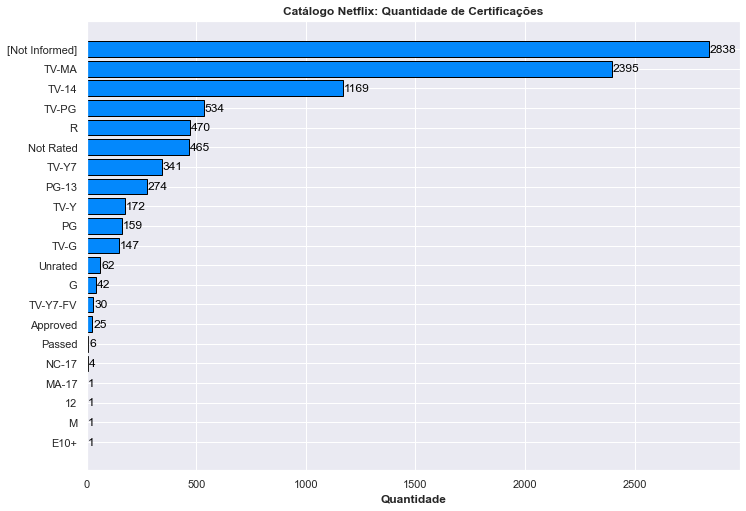

In [171]:
# Bar Chart

# Definindo as variáveis que contém o tipo de certificação e a quantidade respectivamente:
certificates = list(df_certs_clean['certificate_type'])
quantity = list(df_certs_clean['quantity'])

# Plotando
fig, ax = plt.subplots()

hbars = ax.barh(
    certificates, 
    quantity, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )

ax.set_yticks(certificates)
ax.invert_yaxis()
ax.set_xlabel('Quantidade',fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Quantidade de Certificações', fontsize=12, fontweight='bold')

ax.bar_label(hbars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

#### Resposta 2: df_long_duration

In [172]:
# Coletando cada registro de cada certificado e passando esses valores para um novo DataFrame:
df_certs_long = pd.DataFrame(
    df_long_duration['certificate'].value_counts()
    )

# Resetando o index dos registros no novo DataFrame e renomeando as colunas novas:
df_certs_long = df_certs_long.reset_index()
df_certs_long = df_certs_long.rename(
    columns={'index':'certificate_type', 'certificate':'quantity'}
    )

# Visualizando top 5 resultados:
df_certs_long.head()

,certificate_type,quantity
0,TV-MA,106
1,TV-14,27
2,[Not Informed],16
3,PG-13,8
4,TV-PG,7


Aqui já notamos uma diferença em relação aos projetos de minutagem mais curta. O maior número de certificações pertencem a **TV-MA** com 106 registros, seguida por **TV-14** e **Not Informed** respectivamente.

A quantidade de certificações para audiências maduras (TV-MA) ser cerca de 4X maior do que o segundo registro mais presente (TV-14), demonstra que obras de maior duração tendem a serem destinadas para o público adulto.

Uma plotagem gráfica novamente será realizada para melhor visualização dos dados:

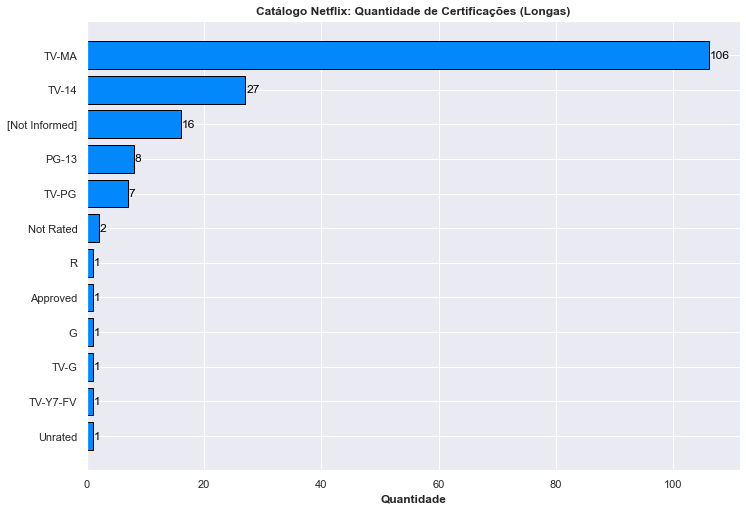

In [173]:
# Bar Chart

# Definindo as variáveis que contém o tipo de certificação e a quantidade respectivamente:
certs_long = list(df_certs_long['certificate_type'])
qnty_long = list(df_certs_long['quantity'])

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    certs_long, 
    qnty_long, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )

ax.set_yticks(certs_long)
ax.invert_yaxis()
ax.set_xlabel('Quantidade',fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Quantidade de Certificações (Longas)', fontsize=12, fontweight='bold')

ax.bar_label(hbars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

### 2. Contabilizar a quantidade de projetos lançados por década

#### Resposta 1: df_movies_clean

In [174]:
# Primeiramente, precisamos pegar todos os registros de cada ano de lançamento
# e passar esses valores para um novo DataFrame:
df_release_clean = pd.DataFrame(df_movies_clean.loc[
    (df_movies_clean['release_year'] != 0), ['release_year']
].value_counts())

# Resetando os índices do novo DataFrame:
df_release_clean = df_release_clean.reset_index()

# Renomeando colunas:
df_release_clean = df_release_clean.rename(columns={0:'quantity'})

# Visualizando resultados:
df_release_clean.head()

,release_year,quantity
0,2019,1299
1,2020,1179
2,2018,1000
3,2021,863
4,2017,799


Para podermos ter conhecimento de quantos projetos foram lançados por década, iremos utilizar cortes de dez anos no Dataset, para isso no entanto, primeiro precisamos saber os anos máximo e mínimo presentes nos dados:

In [175]:
# Identificando os anos máximo e mínimo presentes:
max_year = df_release_clean['release_year'].max()
min_year = df_release_clean['release_year'].min()

print(f'Ano máximo: {max_year}')
print(f'Ano mínimo: {min_year}')

Ano máximo: 2022
Ano mínimo: 1932


Com isso vemos que temos um range de 90 anos de registros. Sendo assim, realizaremos um corte de 9 décadas para podermos visualizar o número de projetos lançados:

In [176]:
# Fatiando o DataFrame por década:
release_decades = pd.cut(df_release_clean['release_year'], bins=9, labels=[
    '1932-1942',
    '1942-1952', 
    '1952-1962', 
    '1962-1972', 
    '1972-1982', 
    '1982-1992', 
    '1992-2002', 
    '2002-2012', 
    '2012-2022'
])

In [177]:
# Inserindo esse recorte no DataFrame como uma nova coluna informando a década em que
# o projeto foi lançado:
df_release_clean['release_decade'] = release_decades

# Checando resultados:
df_release_clean.sample(5)

,release_year,quantity,release_decade
58,1962,3,1952-1962
68,1972,2,1962-1972
73,1963,1,1962-1972
70,1958,2,1952-1962
62,1953,3,1952-1962


Agora, basta agrupar os dados pelas décadas e plotar um gráfico demonstrando quantos projetos foram lançados por década:

In [178]:
# Agrupando dados por décadas:
decades = df_release_clean['release_decade'].value_counts().sort_values()

# Visualizando resultados:
decades

1932-1942     6
1942-1952     7
1952-1962    10
1962-1972    10
1972-1982    10
1982-1992    10
1992-2002    10
2002-2012    10
2012-2022    10
Name: release_decade, dtype: int64

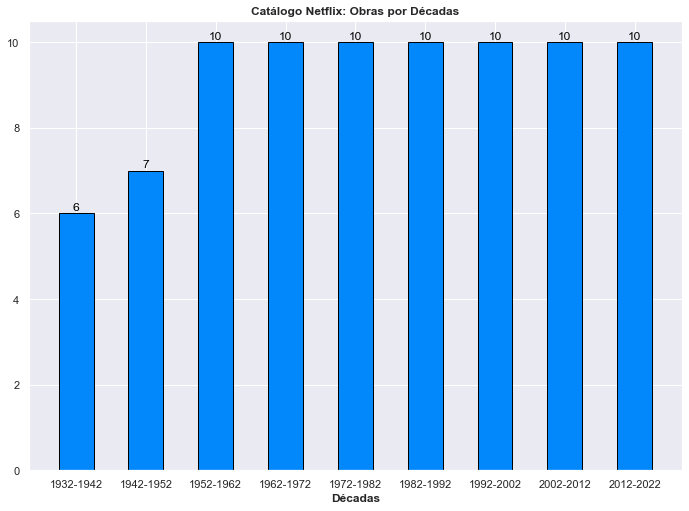

In [179]:
# Bar Chart

# Plotando:
fig, ax = plt.subplots()

bars = ax.bar(
    decades.index, 
    align='center', 
    edgecolor='black', 
    color='#0388fc', 
    height=decades, 
    width=.5
    )
    
ax.set_xlabel('Décadas',fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Obras por Décadas', fontsize=12, fontweight='bold')

ax.bar_label(bars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

No catálogo da Netflix temos 10 projetos de cada década, menos das entre 1932 a 1952.

#### Resposta 2: df_long_duration

Similarmente ao processo executado na resposta 1, vamos pegar os anos de lançamento de cada projeto, identificar os intervalos de décadas, realizar o corte no DataFrame e plotar os resultados.

In [180]:
# Coletando registros:
df_release_long = pd.DataFrame(df_long_duration.loc[
    (df_long_duration['release_year'] != 0), ['release_year']
    ].value_counts())

# Resetando index:
df_release_long = df_release_long.reset_index()

# Renomeando coluna e vendo resultados:
df_release_long = df_release_long.rename(
    columns={0:'quantity'}
    )
df_release_long.head()

,release_year,quantity
0,2021,33
1,2020,31
2,2022,30
3,2019,18
4,2018,15


Agora, vamos para a identificação dos anos máximo e mínimo e para os recortes de décadas:

In [181]:
# Identificando os anos máximo e mínimo presentes:
max_year = df_release_long['release_year'].max()
min_year = df_release_long['release_year'].min()

print(f'Ano máximo: {max_year}')
print(f'Ano mínimo: {min_year}')

Ano máximo: 2022
Ano mínimo: 1956


São 66 anos de registros, sendo assim, será uma divisão de 6 décadas:

In [182]:
# Cortando o DataFrame:
release_decades_long = pd.cut(df_release_long['release_year'], bins=6, labels=[
    '1956-1967',
    '1967-1978',
    '1978-1989', 
    '1989-2000', 
    '2000-2011', 
    '2011-2022'])

# Inserindo os cortes no DataFrame:
df_release_long['release_decade'] = release_decades_long

# Visualizando resultados:
df_release_long.sample(5)

,release_year,quantity,release_decade
1,2020,31,2011-2022
25,2010,1,2000-2011
12,2015,1,2011-2022
9,2001,3,2000-2011
5,2017,10,2011-2022


In [183]:
# Agrupando por década de lançamento:
long_decades = df_release_long['release_decade'].value_counts().sort_values()

# Checando resultados:
long_decades

1978-1989     0
1967-1978     1
1956-1967     3
1989-2000     5
2000-2011     6
2011-2022    11
Name: release_decade, dtype: int64

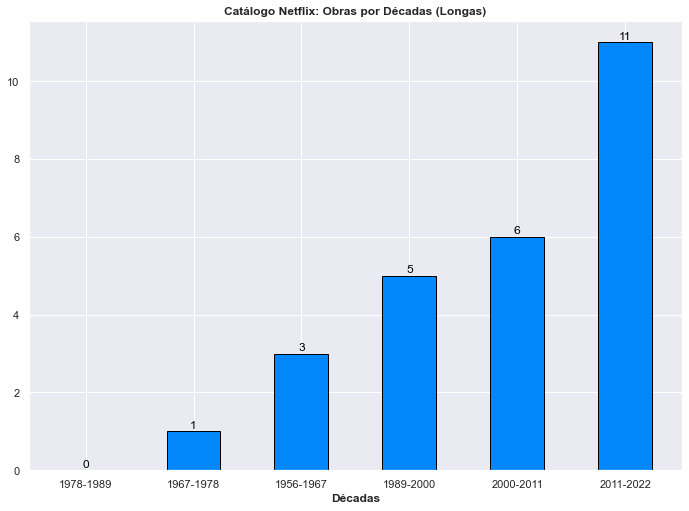

In [184]:
# Bar Chart

# Plotando:
fig, ax = plt.subplots()

bars = ax.bar(
    long_decades.index, 
    align='center', 
    edgecolor='black', 
    color='#0388fc', 
    height=long_decades, 
    width=.5
    )

ax.set_xlabel('Décadas',fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Obras por Décadas (Longas)', fontsize=12, fontweight='bold')

ax.bar_label(bars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

Podemos notar um crescimento no número de produções disponíveis no catálogo Netflix quanto mais recente a década, sendo a década de 2011 até 2022 a que possuí mais obras disponíveis.

### 3. Quais os top 10 gêneros e quantas vezes aparecem nos registros?

#### Resposta 1: df_movies_clean

In [185]:
# Primeiramente, pegaremos os registros dos gêneros das top 10 obras e criar um novo DataFrame:
df_genre_clean = pd.DataFrame(
    df_movies_clean['genre'].value_counts().head(10)
    )

# Resetamos o index:
df_genre_clean = df_genre_clean.reset_index()

# Renomeando colunas:
df_genre_clean = df_genre_clean.rename(
    columns={'index':'genre', 'genre':'quantity'}
    )

# Checando resultados:
df_genre_clean

,genre,quantity
0,Comedy,803
1,"Animation, Action, Adventure",523
2,Drama,506
3,Documentary,485
4,"Comedy, Drama",277
5,"Crime, Drama, Mystery",234
6,"Drama, Romance",234
7,"Comedy, Drama, Romance",204
8,Reality-TV,187
9,"Action, Crime, Drama",166


O gênero mais presente no catálogo Netflix é Comédia, seguido por Animações de Ação e Aventura.

Comédia aparece com uma expressão grande em relação aos outros títulos, tendo mais de 200 projetos de diferença com o segundo maior gênero.

Isso pode ser identificado como resultado das ações da Netflix que adiquiriram muitos direitos autorais de Comedy Specials de diversos comediantes, tantos brasileiros quanto estrangeiros e os colocou em sua plataforma como exclusivos.

Para melhor visualização, vamos plotar um gráfico:

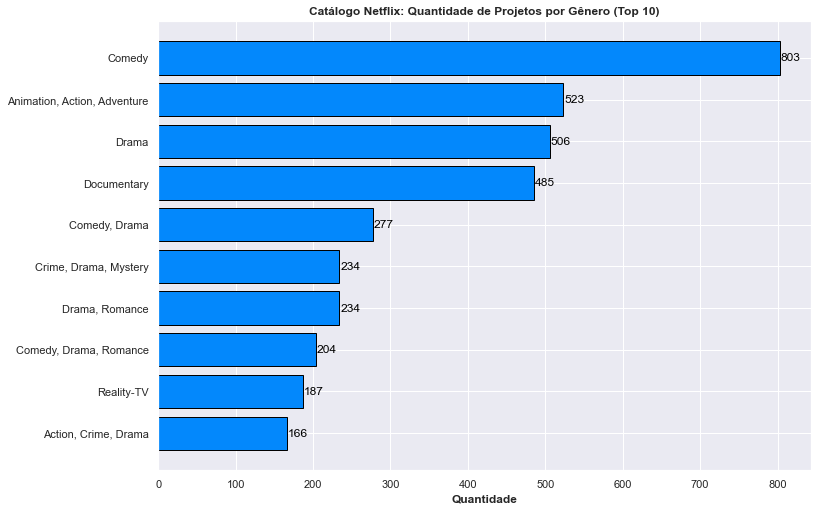

In [186]:
# Bar Chart

# Plotando:
genres = list(df_genre_clean['genre'])
values = list(df_genre_clean['quantity'])

fig, ax = plt.subplots()

hbars = ax.barh(
    genres, 
    values, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )
    
ax.set_yticks(genres)
ax.invert_yaxis()
ax.set_xlabel('Quantidade', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Quantidade de Projetos por Gênero (Top 10)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

#### Resposta 2: df_long_duration

In [187]:
# Primeiramente, pegaremos os registros dos gêneros das top 10 obras e criar um novo DataFrame:
df_genre_long = pd.DataFrame(
    df_long_duration['genre'].value_counts().head(10)
    )

# Resetamos o index:
df_genre_long = df_genre_long.reset_index()

# Renomeando colunas:
df_genre_long = df_genre_long.rename(
    columns={'index':'genre', 'genre':'quantity'}
    )

# Checando resultados:
df_genre_long

,genre,quantity
0,"Documentary, Crime",23
1,Documentary,12
2,"Crime, Drama, Mystery",11
3,"Action, Adventure, Drama",6
4,"Crime, Drama",6
5,"Biography, Crime, Drama",6
6,"Drama, Horror, Mystery",5
7,Drama,5
8,"Drama, Mystery, Thriller",5
9,"Documentary, Crime, Mystery",5


Documentários sobre Crimes são o tipo de gênero mais comum entre os longas, isso pode ser sintoma da crescente aparente em conteúdos True Crime na cultura popular, tendo séries como Jeffrey Dahmer como exemplo mais recente de um sucesso 'complicado' desse tipo de conteúdo.

Outro ponto interessante, são os tipos dos gêneros dos longas, tendo uma aparente têndencia a serem mais pesados/maduros em seus temas. Tópicos como Crime, Drama e Mystery são muito recorrentes nos dados, apenas reforçando a ideia de que obras de longa duração são destinadas primordialmente para públicos adultos.

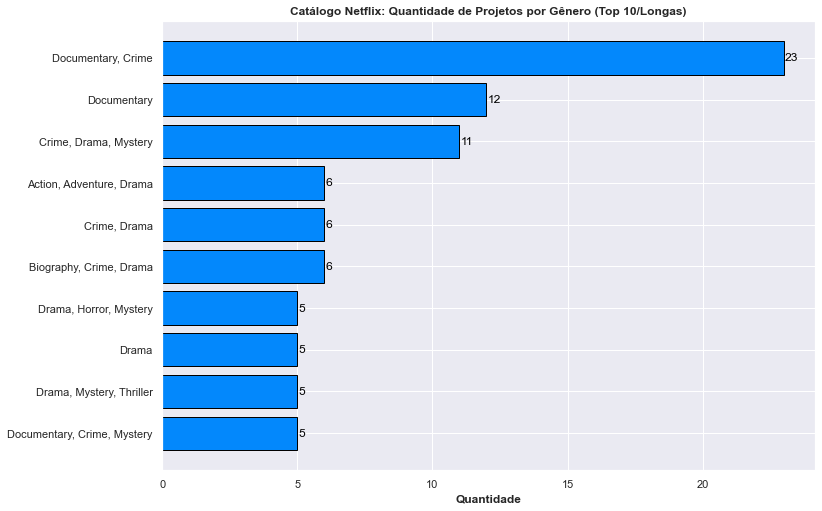

In [188]:
# Bar Chart

# Plotando:
genres_long = list(df_genre_long['genre'])
values_long = list(df_genre_long['quantity'])

fig, ax = plt.subplots()

hbars = ax.barh(
    genres_long, 
    values_long, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )
    
ax.set_yticks(genres_long)
ax.invert_yaxis()
ax.set_xlabel('Quantidade', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Quantidade de Projetos por Gênero (Top 10/Longas)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.f',fontsize=12, color='#000000', padding=1)

plt.show()

### 4. Qual a média de tempo de duração dos projetos por top 10 gêneros?

Para podermos analisar a média de tempo de duração dos projetos por top 10 gêneros, primeiro precisamos definir esses top 10 gêneros em uma variável:

#### Resposta 1: df_movies_clean

In [189]:
# Definindo top 10 gêneros para uma variável:
top_genres = df_movies_clean['genre'].value_counts().head(10)

# Visualizando:
top_genres

Comedy                          803
Animation, Action, Adventure    523
Drama                           506
Documentary                     485
Comedy, Drama                   277
Crime, Drama, Mystery           234
Drama, Romance                  234
Comedy, Drama, Romance          204
Reality-TV                      187
Action, Crime, Drama            166
Name: genre, dtype: int64

Para que a manipulação seja mais fácil, essa variável será trasformada em uma lista:

In [190]:
# Passando dados para uma lista:
genres_list = list(top_genres.index)

# Visualizando:
genres_list

['Comedy',
 'Animation, Action, Adventure',
 'Drama',
 'Documentary',
 'Comedy, Drama',
 'Crime, Drama, Mystery',
 'Drama, Romance',
 'Comedy, Drama, Romance',
 'Reality-TV',
 'Action, Crime, Drama']

Agora que já temos os top 10 gêneros, precisamos coletar as minutagens desses gêneros específicos:

In [191]:
# Coletando registros de minutagem dos materiais que estão no top 10 gêneros
genres_duration = df_movies_clean.loc[
    (df_movies_clean['genre'].isin(genres_list)),
    ['genre', 'duration_min']
]

# Visualizando novos dados:
genres_duration

,genre,duration_min
4,"Animation, Action, Adventure",24
11,"Action, Crime, Drama",89
13,"Crime, Drama, Mystery",139
14,Comedy,118
21,"Drama, Romance",41
...,...,...
9937,"Action, Crime, Drama",60
9939,"Comedy, Drama, Romance",22
9941,Comedy,118
9944,"Crime, Drama, Mystery",139


Agora que possuímos os dados que precisamos para responder a pergunta vamos arrumar o Dataset, começando pro agrupá-lo pela minutagem média:

In [192]:
# Agrupando Dataset pelos gêneros e suas médias de tempo:
genres_duration = genres_duration.groupby('genre').mean()

# Visualizando:
genres_duration

,duration_min
genre,
"Action, Crime, Drama",79.391566
"Animation, Action, Adventure",27.189293
Comedy,58.215442
"Comedy, Drama",63.086643
"Comedy, Drama, Romance",63.039216
"Crime, Drama, Mystery",55.354701
Documentary,57.340206
Drama,66.266798
"Drama, Romance",70.008547


In [193]:
# Dando unstack e resetando index no novo Dataset:
genres_duration = genres_duration.unstack().reset_index()

# Visualizando:
genres_duration

,level_0,genre,0
0,duration_min,"Action, Crime, Drama",79.391566
1,duration_min,"Animation, Action, Adventure",27.189293
2,duration_min,Comedy,58.215442
3,duration_min,"Comedy, Drama",63.086643
4,duration_min,"Comedy, Drama, Romance",63.039216
5,duration_min,"Crime, Drama, Mystery",55.354701
6,duration_min,Documentary,57.340206
7,duration_min,Drama,66.266798
8,duration_min,"Drama, Romance",70.008547
9,duration_min,Reality-TV,20.358289


In [194]:
# Reorganizando colunas novas:
genres_duration = genres_duration.drop(
    'level_0', axis=1
    )
genres_duration = genres_duration.rename(
    columns={0:'duration_mean'}
    )

# Visualizando Dataset finalizado:
genres_duration

,genre,duration_mean
0,"Action, Crime, Drama",79.391566
1,"Animation, Action, Adventure",27.189293
2,Comedy,58.215442
3,"Comedy, Drama",63.086643
4,"Comedy, Drama, Romance",63.039216
5,"Crime, Drama, Mystery",55.354701
6,Documentary,57.340206
7,Drama,66.266798
8,"Drama, Romance",70.008547
9,Reality-TV,20.358289


Para uma visualização ideal, vamos plotar um gráfico com os dados:

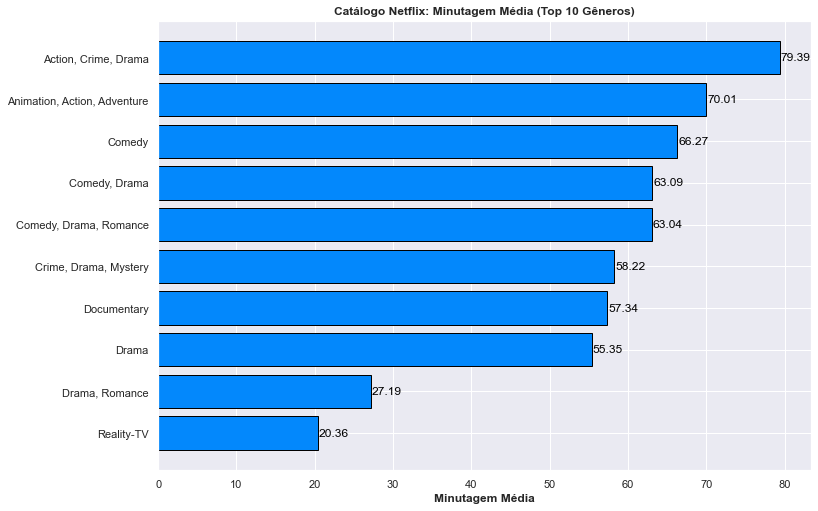

In [195]:
# Bar Chart

# Pegando os dados e transformando-os em listas:
genres = list(genres_duration['genre'])
duration_time = list(genres_duration['duration_mean'].sort_values(ascending=False))

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    genres, 
    duration_time, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )
    
ax.set_yticks(genres)
ax.invert_yaxis()
ax.set_xlabel('Minutagem Média', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Minutagem Média (Top 10 Gêneros)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.2f', fontsize=12, color='#000000', padding=1)

plt.show()

Com o gráfico, podemos ver que os projetos de Ação, Crime e Drama são os que possuem a maior minutagem média, seguido por Animações de Ação e Aventura.

Um dado interessante é a minutagem média de projetos de Reality-TV, onde possuem apenas em média 20 minutos de duração. Na realidade, esse tipo de programação tem em torno de 30 minutos de duração, onde [uma parte desse tempo é tomado por intervalos comerciais](https://joneswriter.medium.com/how-long-should-tv-shows-be-the-rise-of-shorter-tv-6f23a83d572d) na TV.

Porém, como a Netflix não possuí intervalos comerciais no meio de episódios de seus projetos no catálogo, os programas de Reality-TV apresentam seu "verdadeiro" run-time de por volta de 20 minutos, como apontam os dados.

#### Resposta 2: df_long_movies

Para os projetos de longa duração, realizaremos o mesmo processo anterior para termos as informações necessárias:

In [196]:
# Criando a variável com os top 10 gêneros de projetos longos:
top_genres_long = df_long_duration['genre'].value_counts().head(10)

# Passando esses dados para uma lista:
long_genres_list = list(top_genres_long.index)

# Visualizando:
long_genres_list

['Documentary, Crime',
 'Documentary',
 'Crime, Drama, Mystery',
 'Action, Adventure, Drama',
 'Crime, Drama',
 'Biography, Crime, Drama',
 'Drama, Horror, Mystery',
 'Drama',
 'Drama, Mystery, Thriller',
 'Documentary, Crime, Mystery']

In [197]:
# Coletando registros de minutagem dos projetos contidos nesses gêneros:
long_genre_min = df_long_duration.loc[
    (df_long_duration['genre'].isin(genres_list)),
    ['genre', 'duration_min']
]

# Agrupando esses dados pela média do tempo por gênero:
long_genre_min = long_genre_min.groupby('genre').mean()

# Visualizando:
long_genre_min


,duration_min
genre,
"Action, Crime, Drama",405.000000
"Animation, Action, Adventure",218.500000
Comedy,216.250000
"Comedy, Drama",315.000000
"Crime, Drama, Mystery",342.636364
Documentary,300.500000
Drama,306.400000
"Drama, Romance",262.000000


Agora, basta organizarmos os dados e plotarmos o gráfico:

In [198]:
# Realizando o unstack e reindexação do DataFrame:
long_genre_min = long_genre_min.unstack().reset_index()

# Reorganizando colunas:
long_genre_min = long_genre_min.drop(
    'level_0', axis=1
    )
long_genre_min = long_genre_min.rename(
    columns={0:'duration_mean'}
    )

# Visualizando:
long_genre_min

,genre,duration_mean
0,"Action, Crime, Drama",405.000000
1,"Animation, Action, Adventure",218.500000
2,Comedy,216.250000
3,"Comedy, Drama",315.000000
4,"Crime, Drama, Mystery",342.636364
5,Documentary,300.500000
6,Drama,306.400000
7,"Drama, Romance",262.000000


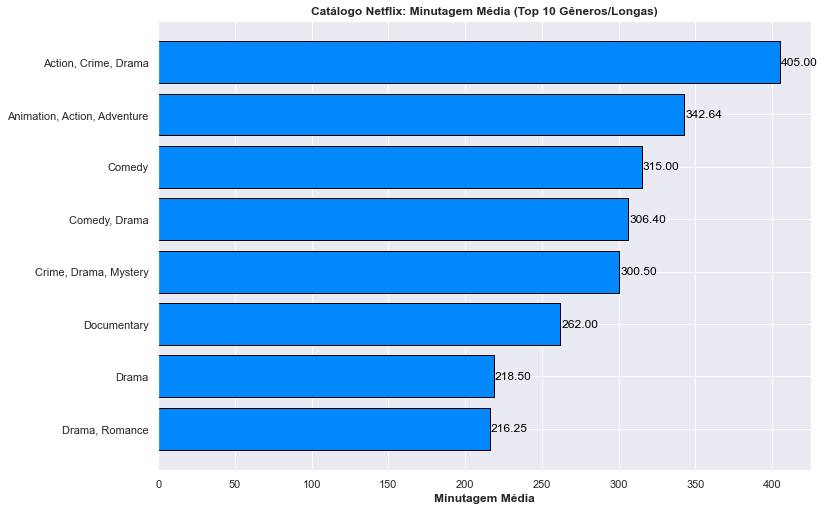

In [199]:
# Bar Chart:

# Repassando so dados para listas:
long_genres = list(long_genre_min['genre'])
long_mean_time = list(long_genre_min['duration_mean'].sort_values(ascending=False))

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    long_genres, 
    long_mean_time, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )

ax.set_yticks(long_genres)
ax.invert_yaxis()
ax.set_xlabel('Minutagem Média', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Minutagem Média (Top 10 Gêneros/Longas)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.2f', fontsize=12, color='#000000', padding=1)

plt.show()

Como dito no início do projeto, esses dados podem ser inconsistentes pelo fato de alguns desses registros não serem um programa "contínuo" como um filme de longa-metragem ou um documentário, mas sim algumas séries que tiveram seus registros e suas minutagens "agregados" em uma única entrada no banco de dados.

Como forma de elucidar ainda mais esse ponto, vamos realizar uma query no banco de dados buscando por programas cuja minutagem é maior do que 500 minutos:

In [200]:
df_long_duration.query('duration_min > 500').head(3)

,title,release_year,ending_year,certificate,duration_min,genre,rating,description,stars,votes
6,Dahmer - Monster: The Jeffrey Dahmer Story,2022,0,TV-MA,534,"Biography, Crime, Drama",8.5,Story of the Milwaukee Monster told from the p...,"['Evan Peters, ', 'Richard Jenkins, ', 'Molly ...",5580
8,The Haunting of Hill House,2018,0,TV-MA,572,"Drama, Horror, Mystery",8.6,"Flashing between past and present, a fractured...","['Michiel Huisman, ', 'Carla Gugino, ', 'Henry...",237198
11,Maid,2021,0,TV-MA,545,Drama,8.4,"After fleeing an abusive relationship, a young...","['Margaret Qualley, ', 'Nick Robinson, ', 'Ryl...",81102


Como exemplo, em primeiro lugar temos a nova série contoversa da Netflix sobre Jeffrey Dahmer que possuí uma temporada até o momento presente.

De acordo com os dados, a duração completa desse projeto é de 534 minutos, o que é a demonstração do comentado acima, de que algumas séries foram inseridas no banco de dados como um único registro, enquanto outras tiveram cada episódio lançado independentemente no Dataset.

Com isso em mente, essas análises acerca dos programas longos devem ser interpretadas com cautela, pois os dados não são 100% integros.

### 5. Qual a média de ratings dadas aos projetos por top 10 gêneros?

Outra métrica interessante de ser observada é a media de avaliações que os projetos presentes nos top 10 gêneros do catálogo Netflix receberam.

#### Resposta 1: df_movies_clean

In [201]:
# Redefinindo os top 10 gêneros:
movies_genres = df_movies_clean['genre'].value_counts().head(10)

# Passando para uma lista:
genres_list = list(movies_genres.index)

# Coletando as avaliações dadas aos projetos presentes nesses gêneros:
top_genres = df_movies_clean.loc[
    (df_movies_clean['genre'].isin(genres_list)),
    ['genre', 'rating']
]

# Reagrupando:
top_genres = top_genres.groupby('genre').mean()

# Visualizando:
top_genres

,rating
genre,
"Action, Crime, Drama",6.383735
"Animation, Action, Adventure",7.374570
Comedy,6.105729
"Comedy, Drama",6.789892
"Comedy, Drama, Romance",6.509804
"Crime, Drama, Mystery",7.406838
Documentary,6.520825
Drama,6.324901
"Drama, Romance",6.673504


In [202]:
# Dando unstack e reindexação no DataFrame:
top_genres = top_genres.unstack().reset_index()
top_genres = top_genres.drop(
    'level_0', axis=1
    )
top_genres = top_genres.rename(
    columns={0:'rating_mean'}
    )

# Visualizando:
top_genres

,genre,rating_mean
0,"Action, Crime, Drama",6.383735
1,"Animation, Action, Adventure",7.374570
2,Comedy,6.105729
3,"Comedy, Drama",6.789892
4,"Comedy, Drama, Romance",6.509804
5,"Crime, Drama, Mystery",7.406838
6,Documentary,6.520825
7,Drama,6.324901
8,"Drama, Romance",6.673504
9,Reality-TV,6.209626


Para uma melhor visualização, vamos plotar um gráfico com os dados:

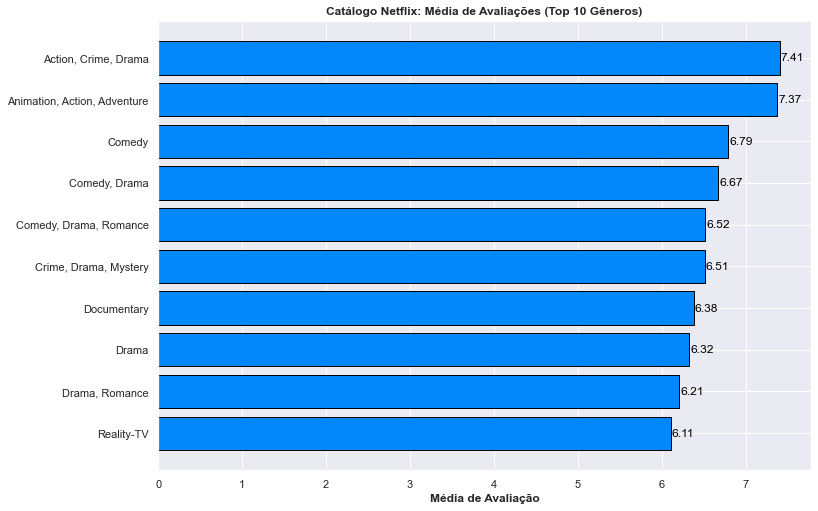

In [203]:
# Bar chart

# Atribuindo dados para uma lista:
genres = list(top_genres['genre'])
ratings = list(top_genres['rating_mean'].sort_values(ascending=False))

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    genres,
    ratings, 
    align='center', 
    edgecolor='black',
    color='#0388fc'
    )
    
ax.set_yticks(genres)
ax.invert_yaxis()
ax.set_xlabel('Média de Avaliação', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Média de Avaliações (Top 10 Gêneros)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.2f', fontsize=12, color='#000000', padding=1)

plt.show()

Os programas mais bem avaliados na média são aqueles de Ação, Crime e Drama, seguidos por Animações de Ação e Aventura.

Curiosamente esses dois gêneros também são os de minutagem média mais alta dos programas abaixo de 175 minutos, e Reality-TV, além de ser o de menor minutagem média, também possuí a menor média de avaliações positivas no catálogo.

Isso pode indentificar um padrão de consumo nos clientes Netflix, onde aparenta-se que consumidores do serviço de streaming tendem a preferir programas de maior minutagem e incluso nessa métrica também, os programas especiais de Comédia, que também constam como uns dos gêneros de maior minutagem média e agora de acordo com o gráfico, também aparecem como o terceiro mais bem avaliado.

#### Resposta 2: df_movies_long

In [204]:
# Redefinindo os top 10 gêneros:
long_gens = df_long_duration['genre'].value_counts().head(10)

# Passando para uma lista:
lista_long_gens = list(long_gens.index)

# Coletando as avaliações dadas aos projetos presentes nesses gêneros:
top_longs = df_long_duration.loc[
    (df_long_duration['genre'].isin(lista_long_gens)), 
    ['genre', 'rating']
    ]

# Reagrupando:
top_longs = top_longs.groupby('genre').mean()

# Visualizando:
top_longs

,rating
genre,
"Action, Adventure, Drama",7.833333
"Biography, Crime, Drama",7.966667
"Crime, Drama",6.950000
"Crime, Drama, Mystery",6.954545
Documentary,7.608333
"Documentary, Crime",7.273913
"Documentary, Crime, Mystery",7.060000
Drama,7.500000
"Drama, Horror, Mystery",6.960000


In [205]:
# Dando unstack e reindexação no DataFrame:
top_longs = top_longs.unstack().reset_index()
top_longs = top_longs.drop(
    'level_0', axis=1
    )
top_longs = top_longs.rename(
    columns={0:'rating_mean'}
    )

# Visualizando
top_longs

,genre,rating_mean
0,"Action, Adventure, Drama",7.833333
1,"Biography, Crime, Drama",7.966667
2,"Crime, Drama",6.950000
3,"Crime, Drama, Mystery",6.954545
4,Documentary,7.608333
5,"Documentary, Crime",7.273913
6,"Documentary, Crime, Mystery",7.060000
7,Drama,7.500000
8,"Drama, Horror, Mystery",6.960000
9,"Drama, Mystery, Thriller",6.620000


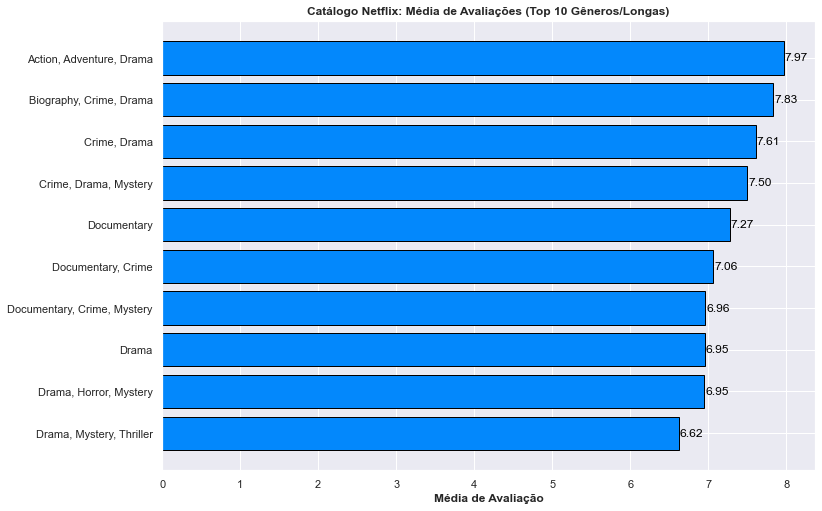

In [206]:
# Bar chart

# Atribuindo dados para uma lista:
gens_long = list(top_longs['genre'])
means_long = list(top_longs['rating_mean'].sort_values(ascending=False))

# Plotando:
fig, ax = plt.subplots()

hbars = ax.barh(
    gens_long, 
    means_long, 
    align='center', 
    edgecolor='black', 
    color='#0388fc'
    )
    
ax.set_yticks(gens_long)
ax.invert_yaxis()
ax.set_xlabel('Média de Avaliação', fontsize=12, fontweight='bold')
ax.set_title('Catálogo Netflix: Média de Avaliações (Top 10 Gêneros/Longas)', fontsize=12, fontweight='bold')
ax.bar_label(hbars, fmt='%.2f', fontsize=12, color='#000000', padding=1)

plt.show()

Algo a se destacar é o fato de que os projetos que aparecem com duração maior de 175 minutos, possuem avaliações médias mais altas no geral quando comparados aos outros projetos menores. Basta aferir os valores dessas notas médias dos longas em comparação com o mesmo gráfico do df_movies_clean:

**df_movies_clean**
    
    - Maiores notas: 7.41, 7.37, 6.79
    - Menores notas: 6.11, 6.21, 6.32

**df_movies_long**

    - Maiores notas: 7.97, 7.83, 7.61
    - Menores notas: 6.62, 6.95, 6.95

Com isso, podemos identificar novamente o aparente padrão que os dados apresentam, onde projetos mais longos aparentam ter recepções e avaliações melhores no catálogo Netflix.

### 6. Quais são os programas mais bem avaliados no geral?


Como uma pergunta final, vamos buscar compreender quais são os registros que constam com maior avaliação no geral no catálogo Netflix, com base nos nossos dois Datasets:

#### Resposta 1: df_movies_clean

In [207]:
# Filtrando Dataset em busca dos programas mais bem avaliados:
ratings_list = df_movies_clean.loc[
    :, 
    ['title', 'genre', 'rating', 'votes']
    ].sort_values(['rating'], ascending=False).head(10)

# Resetando index:
ratings_list = ratings_list.reset_index()
ratings_list = ratings_list.drop(columns={'index'})

# Visualizando:
ratings_list

,title,genre,rating,votes
0,BoJack Horseman,"Animation, Comedy, Drama",9.9,16066
1,Avatar: The Last Airbender,"Animation, Action, Adventure",9.6,3953
2,Stranger Things,"Drama, Fantasy, Horror",9.6,36276
3,JoJo's Bizarre Adventure,"Animation, Action, Adventure",9.6,1442
4,1899,"Drama, History, Horror",9.6,853
5,Avatar: The Last Airbender,"Animation, Action, Adventure",9.6,5221
6,Dexter,"Crime, Drama, Mystery",9.6,10604
7,BoJack Horseman,"Animation, Comedy, Drama",9.5,6230
8,Dark,"Crime, Drama, Mystery",9.5,14007
9,Anne with an E,"Drama, Family",9.5,2488


O programa que consta com a maior avaliação com um surpreendente 9.9 é BoJack Horseman, um clássico presente no catálogo, seguido por um episódio específico de Avatar: The Last Airbender e um episódio de Stranger Things.

É interessante notar que BoJack Horseman além de ser o número, aparece novamente na posição 7 com outro episódio com avaliação 9.5.

Avatar: The Last Airbender também se repete e apare nas posições 2 (de index 1) e 6 (index 5).

#### Resposta 2: df_long_movies

In [208]:
# Filtrando Dataset em busca dos programas mais bem avaliados:
ratings_long = df_long_duration.loc[
    :, 
    ['title', 'genre', 'rating', 'votes']
    ].sort_values(['rating'], ascending=False).head(10)

# Resetando index:
ratings_long = ratings_long.reset_index()
ratings_long = ratings_long.drop(columns={'index'})

# Visualizando:
ratings_long

,title,genre,rating,votes
0,Cosmos: A Spacetime Odyssey,Documentary,9.3,121400
1,Our Planet,Documentary,9.3,43175
2,The Last Dance,"Documentary, Biography, History",9.1,119768
3,The Vietnam War,"Documentary, History, War",9.1,24632
4,Frozen Planet,Documentary,9.0,30498
5,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",9.0,1819157
6,When They See Us,"Biography, Crime, Drama",8.9,119339
7,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",8.8,1844075
8,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",8.8,1844055
9,The Lord of the Rings: The Two Towers,"Action, Adventure, Drama",8.8,1642708


O longa mais bem avaliado é a série documentária sobre o espaço, Cosmos: A Spacetime Odyssey com 9.3, um valor muito bom porém 0.6 pontos abaixo de BoJack Horseman. No geral, as avaliações dos longas aparentam ser menores em relação aos programas mais curtos, uma inversão curiosa do padrão visto até aqui, onde os longas tiveram avaliações em média mais alta do que os curtos.

Isso pode aparentar que, por mais que os top 10 programas individuais longas tem avaliações menores do que os curtos, no catálogo como um todo eles possuem avaliações médias mais altas, indicando uma consistência de qualidade e satisfação do cliente maior com tais projetos.

### Bônus: Quais correlações gerais podemos estrair dos dados?

Como um bônus de encerramento, vamos analisar as correlações entre as tabelas do Dataset e tentar aferir as características que vimos até aqui.

In [209]:
# Correlação do primeiro DataFrame:
df_movies_clean.corr()

,release_year,ending_year,duration_min,rating,votes
release_year,1.000000,0.017995,0.004520,0.176815,0.002592
ending_year,0.017995,1.000000,-0.281208,0.275709,0.066237
duration_min,0.004520,-0.281208,1.000000,-0.001992,0.156147
rating,0.176815,0.275709,-0.001992,1.000000,0.128175
votes,0.002592,0.066237,0.156147,0.128175,1.000000


In [210]:
# Correlação do segundo Dataframe:
df_long_duration.corr()

,release_year,ending_year,duration_min,rating,votes
release_year,1.000000,-0.051874,0.090713,-0.186243,-0.318940
ending_year,-0.051874,1.000000,0.170469,0.093072,-0.056761
duration_min,0.090713,0.170469,1.000000,0.331182,-0.120481
rating,-0.186243,0.093072,0.331182,1.000000,0.287831
votes,-0.318940,-0.056761,-0.120481,0.287831,1.000000


Um ponto interessante é a têndencia préviamente observada de que projetos longos tem uma têndencia a ter avaliações mais altas e o inverso acontecendo no primeiro dataset.

**df_movies_clean**

    Correlação rating e duration_min:
        -0.001992

Uma correlação pequena, porem que tende para baixo. Ou seja, quanto maior a avaliação do projeto, menor ele é ou vice versa.

**df_long_movies**

    Correlação rating e duration_min:
        0.331182

Uma correlação bem mais pronunciada do que a do primeiro dataset. Quanto maior a avaliação do projeto, mais longo ele é, o inverso do ocorrido nos projetos menores, comprovando a tendência já observada ao longo das análises.